# Question 1

# Discrete Fourier Transform

In [2]:
'''Discrete fourier transform'''
import numpy as np 
import matplotlib.pyplot as plt
import cmath
# function to implement DFT
def DFT(array,N):
    array1 = np.zeros(N,dtype = 'complex')
    
    for k in range(N):
        for n in range(N):
            theta = 2j*np.pi*n*k/N
            array1[k] = array1[k]+array[n]*cmath.exp(-theta)
    
    return array1

In [3]:
'''Discrete inverse fourier transform'''
# function to implement Idft
def IDFT(array,N):
    array1 = np.zeros(N,dtype = 'complex')
    
    for n in range(N):
        for k in range(N):
            theta = 2j*np.pi*n*k/N
            array1[n] = array1[n]+array[k]*cmath.exp(-theta)
    array1=array1/N
    return array1

In [4]:
'''Obtain DTFS coefficients by modified DFT function'''
def m_DFT(array,N):
    array1 = np.zeros(N,dtype = 'complex')
    
    for k in range(N):
        for n in range(N):
            theta = 2j*np.pi*n*k/N
            array1[k] = array1[k]+array[n]*cmath.exp(-theta)
    array1 = array1.tolist()
    for i in range(3):
        array1.extend(array1)
    array1 = np.array(array1)
    return array1   

A signal is given as x(t)=cos2pift where f = 30Hz.The signal is sampled at 100 times per second for 0.91 second and then its DFT 
is computed. Plot the spectrum vs frequency in HZ .What is the magnitude of DFT at 35Hz ? IS this value is non zero ?
If so then why?

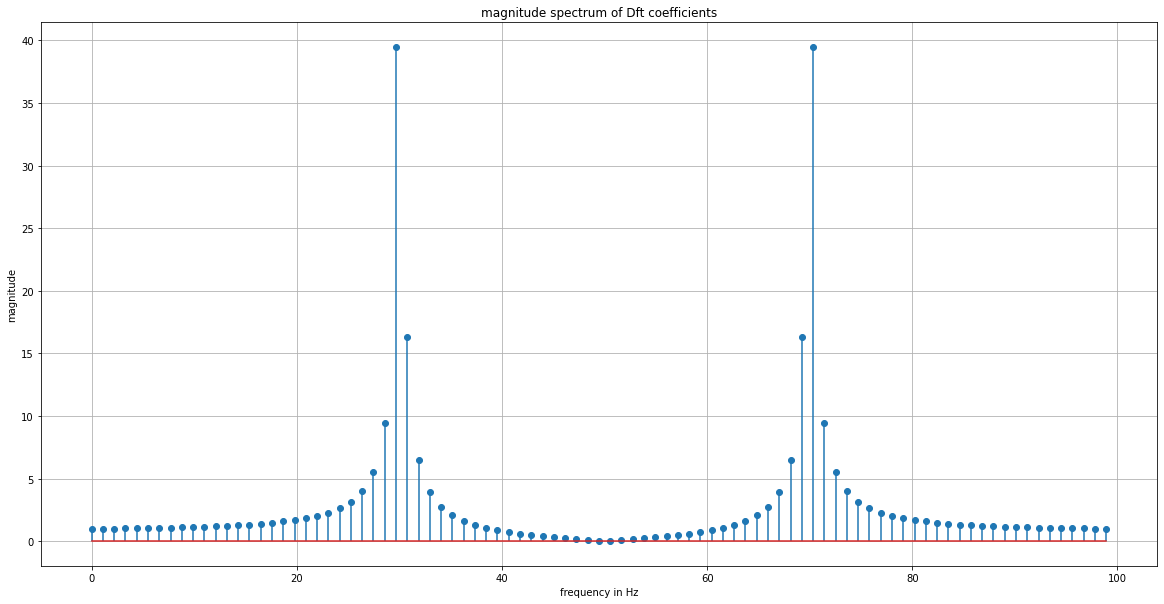

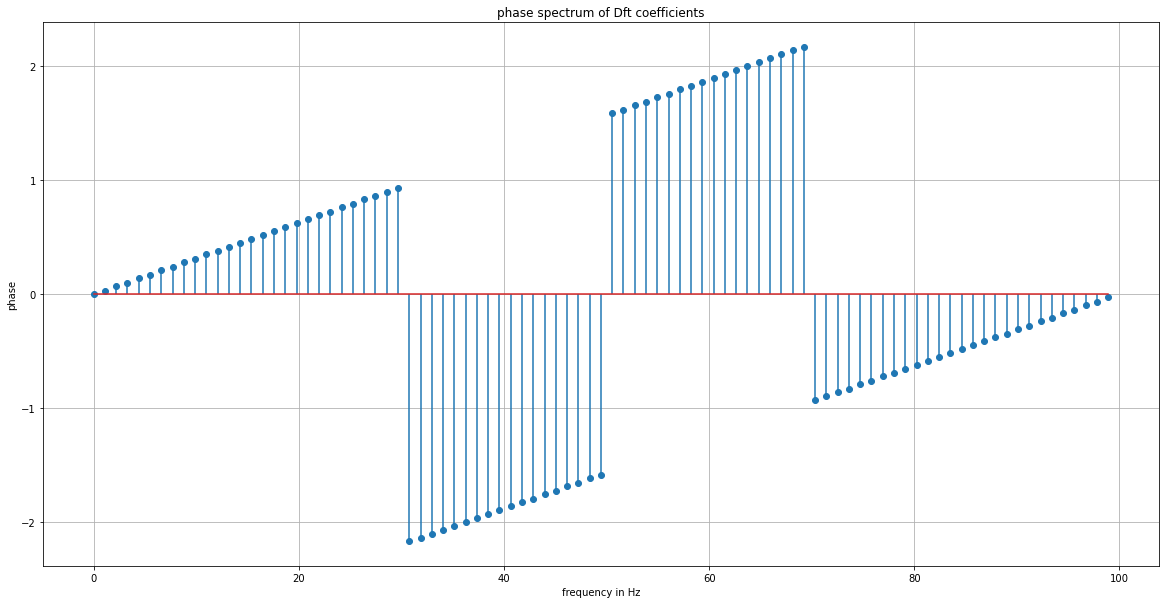

In [5]:
A =1
f0=30
fs = 100 
T=0.91
N=91
n = np.arange(N)
fn = (n*fs)/N
t =np.arange(0,T,1/fs)
x = A*np.cos(2*np.pi*f0*t)
y = DFT(x,N)
 
# for plotting the spectrum 
mag_y = np.round(np.abs(y),2)
phase_y = np.round(np.angle(y),2)
fig = plt.figure(figsize=(20,10))
plt.stem(fn,mag_y,use_line_collection=True)
plt.title('magnitude spectrum of Dft coefficients')
plt.ylabel('magnitude')
plt.xlabel('frequency in Hz')
plt.grid(True)
plt.show()
fig = plt.figure(figsize=(20,10))
plt.stem(fn,phase_y,use_line_collection=True)
plt.title('phase spectrum of Dft coefficients')
plt.ylabel('phase')
plt.xlabel('frequency in Hz')
plt.grid(True)
plt.show()


In [6]:
# What is the magnitude of Dft at 35Hz
mag = np.round(np.abs(y)[np.round(fn)==35][0],2)
print('The magnitude of the DFT coefficient at f = 35Hz is:',mag)

The magnitude of the DFT coefficient at f = 35Hz is: 2.05


In [7]:
'''Function to compute circular convolution'''
def cir_conv(x,h):
    output=[]
    m = len(x)
    g = x[::-1]
    for i in range(0,m):
        g = g[-1:]+g[:-1]
        b = sum([a*b for a,b in zip(g,h)])
        output.append(b)
    return output



In [8]:
x=[1,2,3,0,0,0,0]
h=[1,1,1,1,1,1,1]
y= cir_conv(x,h)
print("the circular convolution of x and h is :",y)

the circular convolution of x and h is : [6, 6, 6, 6, 6, 6, 6]


Consider the two sequences x = [1,-3,1,5] and y =[7,-7,-9,-3].Does there exist a sequence h 
such that y is the circular convolution of x and h.Find h using DFT and IDFT

In [9]:
x = [1,-3,1,5]
y = [7,-7,-9,-3]
dft_x = DFT(x,len(x))
print('DFT of x is:',dft_x)
dft_y = DFT(y,len(y))
print('DFT of y is:',dft_y)
dft_h = dft_y/dft_x
print('DFT of h is:',dft_h)
imph = IDFT(dft_h,len(dft_h))
print('impulse response of H[k]:',imph)

DFT of x is: [ 4.00000000e+00+0.0000000e+00j -1.14052970e-15+8.0000000e+00j
  0.00000000e+00-1.2246468e-15j  3.19954451e-15-8.0000000e+00j]
DFT of y is: [-12.+0.0000000e+00j  16.+4.0000000e+00j   8.-2.4492936e-16j
  16.-4.0000000e+00j]
DFT of h is: [-3. +0.00000000e+00j  0.5-2.00000000e+00j  0.2+6.53249574e+15j
  0.5+2.00000000e+00j]
impulse response of H[k]: [-0.45+1.63312394e+15j -1.6 -1.63312394e+15j -1.35+1.63312394e+15j
  0.8 -1.63312394e+15j]


Compute the energy of the signal x[n]= (3/4)^n u[n] for 0<n<50. If the DFT of this signal is X(k)
thenwhat is the energy of X(K) and how does it relate to that of x[n]

In [10]:
def unit_step(time,amp,phase):
    u = np.zeros(len(time))
    for i in range(len(time)):
        if time[i] >= phase:
            u[i] = amp
    return u
n = np.linspace(0,50,91)
u = unit_step(t,1,0)
x = (3/4)*n*u 
dft_x = DFT(x,len(x))

E1 =0
for i in range(len(x)):
    E1 = E1 + ((dft_x[i])**2)
print("energy of seq x[n] : ",E1) 


E2 =0
for i in range(len(dft_x)):
    E2 = E2 + ((dft_x[i])**2)
print("energy of dft of sequence x[n] : ",E2)

energy of seq x[n] :  (1983989.5833333454-3.060631570406258e-08j)
energy of dft of sequence x[n] :  (1983989.5833333454-3.060631570406258e-08j)


# Question 2

# Discrete Cosine Transform 

Consider a signal x[n]= [8,16,24,32,40,48,56,64] of length N =8.Compute the DCT of the signal.

In [11]:
'''DCT of signal x[n]'''
import numpy as np 
import matplotlib.pyplot as plt
def DCT(N,x,c):
    X=[]
    for m in range(0,N):
        output=0
        for n in range(0,N):
            output =output + x[n]*c[m]*np.cos((np.pi*m/(2*N))*(2*n+1))
            
           
        X.append(round(output*np.sqrt(2/N),2))
    return X
x = [8,16,24,32,40,48,56,64]
N = 8
c= [1/np.sqrt(2),1,1,1,1,1,1,1]
dct = DCT(N,x,c)
print('DCT of the signal x[n] is:',dct)



#calculating the total energy of signal 
et =0
for k in range(8):
    et+=(dct[k])**2
print('the total energy of the signal is:',et)


#calculating the energy by taking only four DCT coefficients
e =0
for i in range(4):
    e+=(dct[i])**2
print('the energy of only four coefficients is:',e)


DCT of the signal x[n] is: [101.82, -51.54, -0.0, -5.39, 0.0, -1.61, -0.0, -0.41]
the total energy of the signal is: 13055.4963
the energy of only four coefficients is: 13052.7361


Compute the inverse DCT of the sequence obtained and plot it alongside x[n]

the inverse DCT of the sequence :  [15.16, 28.63, 39.78, 48.24, 52.74, 51.59, 43.5, 27.6]


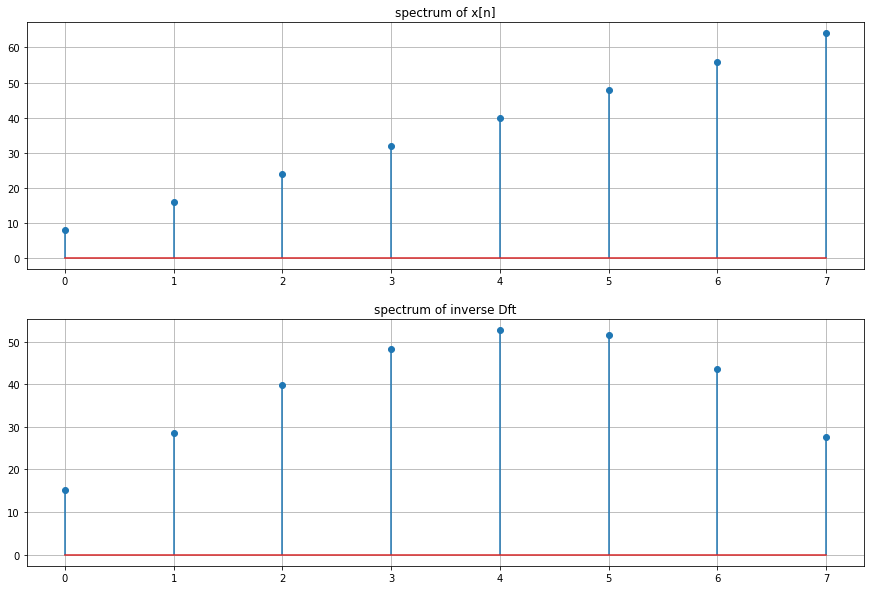

In [12]:
def inverseDCT(N,s,c):
    x=[]
    for i in range(0,N):
        summ = 0
        for j in range(0,N):
            summ = summ + s[j]*c[j]*np.cos(((np.pi*j)(2*N))*(2*n+1))
        x.append(summ*np.sqrt(2/N))
    return x

c = [1/np.sqrt(2),1,1,1,1,1,1,1]
N =8
inverse = DCT(N,dct,c)
print("the inverse DCT of the sequence : ",inverse)

x =[8,16,24,32,40,48,56,64]
fig= plt.figure(figsize=(15,10))
n =np.arange(0,8,1)

plt.subplot(2,1,1)
plt.stem(n,x,use_line_collection=True)
plt.title('spectrum of x[n]')
plt.grid()

plt.subplot(2,1,2)
plt.stem(n,inverse,use_line_collection=True)
plt.title('spectrum of inverse Dft')
plt.grid()

In [13]:
'''Mean Square Error'''
mse = 0
for i in range(N):
    mse = mse+ (x[i]-dct[i])**2
print('mean square error with DCT is :',mse/N)

mean square error with DCT is : 3335.4570374999994


In [15]:
'''mean square error with IdCt '''
mse1 = 0
for i in range(N):
    mse1 = mse1+ (x[i]-inverse[i])**2
print('mean square error with IDCT is :',mse1/N)

mean square error with IDCT is : 297.49177499999996
